In [0]:
from statistics import mean
import numpy as np

import random

def create_dataset(hm,variance,step=2,correlation=False):
  val=1
  ys=[]
  for i in range(hm):
    y=val+random.randrange(-variance,variance)
    ys.append(y)
    if correlation and correlation=='pos':
      val+=step
    if correlation and correlation=='neg':
      val-=step
  xs= [i for i in range(len(ys))]  
  return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)
xs,ys=create_dataset(40,40,2,'neg')  



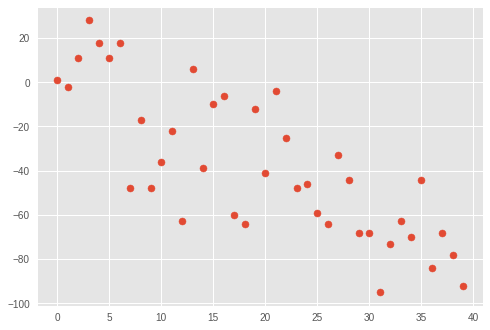

In [31]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.scatter(xs,ys)

In [0]:
def best_fit_slope_and_intercept(ys,xs):
  m=(mean(xs)*mean(ys)-mean(xs*ys))/((mean(xs)*mean(xs))-mean(xs*xs))
  b=mean(ys)-m*mean(xs)
  return m, b

m,b=best_fit_slope_and_intercept(ys,xs)  


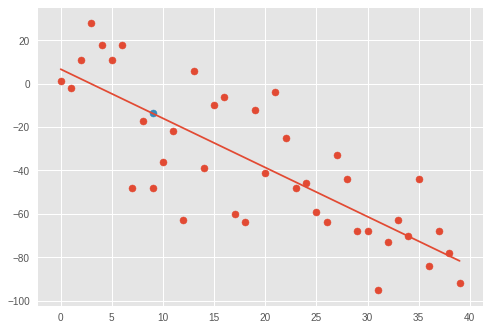

In [33]:
regression_line=[(m*x)+b for x in xs]

plt.plot(xs,regression_line)
plt.scatter(xs,ys)
pt=9
pty=[m*pt+b]
plt.scatter([pt],pty)

In [34]:
#squared error

def squared_error(y_orig,y_line):
  return sum((y_line-y_orig)*(y_line-y_orig))

def coefficient_of_determination(y_orig,y_line):
  y_m_line=[mean(y_orig) for y in y_orig]
  squared_err_line=squared_error(y_orig,y_line)
  squared_err_y=squared_error(y_orig,y_m_line)
  return 1-(squared_err_line/squared_err_y)

print(coefficient_of_determination(ys,regression_line))


0.6287445581431219
